In [119]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

## Step 1: Pre-processing data

### Read Datasets

In [120]:
GSPC = pd.read_csv('Dataset/GSPC.csv')
EFFR = pd.read_csv('Dataset/EFFR.csv')
XAU = pd.read_csv('Dataset/XAU.csv')
DXYArea = pd.read_csv('Dataset/DXYArea.csv')

### Clean and Modify Datasets

#### 1. GSPC

In [121]:
GSPC.head(25)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,3247.159912,3258.850098,3234.500000,3243.629883,3243.629883,3823100000
1,2020-01-28,3255.350098,3285.780029,3253.219971,3276.239990,3276.239990,3526720000
2,2020-01-29,3289.459961,3293.469971,3271.889893,3273.399902,3273.399902,3584500000
3,2020-01-30,3256.449951,3285.909912,3242.800049,3283.659912,3283.659912,3787250000
4,2020-01-31,3282.330078,3282.330078,3214.679932,3225.520020,3225.520020,4527830000
5,2020-02-03,3235.659912,3268.439941,3235.659912,3248.919922,3248.919922,3757910000
6,2020-02-04,3280.610107,3306.919922,3280.610107,3297.590088,3297.590088,3995320000
7,2020-02-05,3324.909912,3337.580078,3313.750000,3334.689941,3334.689941,4117730000
8,2020-02-06,3344.919922,3347.959961,3334.389893,3345.780029,3345.780029,3868370000
9,2020-02-07,3335.540039,3341.419922,3322.120117,3327.709961,3327.709961,3730650000


In [122]:
#Clean Data
GSPC=GSPC.drop(columns=['Open','High','Low','Adj Close','Volume'])

In [123]:
#Set Index
GSPC['Date'] = pd.to_datetime(GSPC['Date'])
GSPC=GSPC.set_index('Date')
GSPC.head(25)

,Close
Date,
2020-01-27,3243.629883
2020-01-28,3276.239990
2020-01-29,3273.399902
2020-01-30,3283.659912
2020-01-31,3225.520020
2020-02-03,3248.919922
2020-02-04,3297.590088
2020-02-05,3334.689941
2020-02-06,3345.780029


#### 2.  EFFR

In [124]:
EFFR.head(25)

,DATE,EFFR
0,1/27/2020,1.55
1,1/28/2020,1.55
2,1/29/2020,1.55
3,1/30/2020,1.6
4,1/31/2020,1.59
5,2/3/2020,1.59
6,2/4/2020,1.59
7,2/5/2020,1.59
8,2/6/2020,1.59
9,2/7/2020,1.58


In [125]:
#Set Index
EFFR=EFFR.rename(columns={'DATE':'Date'})
EFFR['Date'] = pd.to_datetime(EFFR['Date'])
EFFR=EFFR.set_index('Date')
EFFR.head(25)

,EFFR
Date,
2020-01-27,1.55
2020-01-28,1.55
2020-01-29,1.55
2020-01-30,1.6
2020-01-31,1.59
2020-02-03,1.59
2020-02-04,1.59
2020-02-05,1.59
2020-02-06,1.59


#### 3. XAU

In [126]:
XAU.head(25)

,Date,Price,Open,High,Low,Change %
0,21-Apr-20,1691.30,1691.13,1697.93,1661.20,-0.17%
1,20-Apr-20,1694.11,1692.25,1703.46,1671.49,0.56%
2,17-Apr-20,1684.69,1715.99,1719.12,1679.37,-1.96%
3,16-Apr-20,1718.40,1716.46,1739.17,1707.88,0.11%
4,15-Apr-20,1716.60,1728.80,1732.27,1707.71,-0.76%
5,14-Apr-20,1729.70,1712.34,1747.85,1708.55,0.90%
6,13-Apr-20,1714.32,1685.69,1723.88,1674.87,1.45%
7,10-Apr-20,1689.90,1676.00,1697.50,1676.00,0.35%
8,9-Apr-20,1684.07,1646.08,1691.17,1643.10,2.28%
9,8-Apr-20,1646.52,1647.59,1657.69,1641.94,-0.15%


In [127]:
#Modify Datatype
Date = XAU.Date.tolist() 
Date = Date[::-1] 
Price = XAU.Price.tolist()
Price = Price[::-1]

#Clean Data
XAU =  pd.DataFrame({'Date': Date, 'Price' : Price})
XAU.head(5)

#Set Index
XAU['Date'] = pd.to_datetime(XAU['Date'])
XAU=XAU.set_index('Date')
XAU.head(25)

,Price
Date,
2017-03-21,1245.00
2017-03-22,1249.35
2017-03-23,1245.30
2017-03-24,1244.17
2017-03-27,1254.30
2017-03-28,1251.63
2017-03-29,1252.45
2017-03-30,1243.30
2017-03-31,1249.13


#### 4. DXYArea

In [128]:
DXYArea.head(5)

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,updateTime,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
0,亚洲,Asia,印度,India,印度,India,953003,18985,0.0,3260,603,2020-04-21 20:39:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,亚洲,Asia,印度尼西亚,Indonesia,印度尼西亚,Indonesia,952005,6760,0.0,747,590,2020-04-21 20:39:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,亚洲,Asia,中国,China,天津市,Tianjin,120000,189,48.0,176,3,2020-04-21 20:33:57,境外输入,NaN,0.0,53.0,0.0,43.0,0.0
3,亚洲,Asia,中国,China,天津市,Tianjin,120000,189,48.0,176,3,2020-04-21 20:33:57,宝坻区,Baodi District,120115.0,60.0,0.0,58.0,2.0
4,亚洲,Asia,中国,China,天津市,Tianjin,120000,189,48.0,176,3,2020-04-21 20:33:57,河东区,Hedong District,120102.0,15.0,0.0,14.0,1.0


In [129]:
#Clean the data
DXYArea = DXYArea.drop(columns=['continentName','countryName','provinceName','province_zipCode','province_suspectedCount', 'city_suspectedCount', 'province_zipCode', 'city_zipCode', 'cityName', 'cityEnglishName','city_confirmedCount','city_curedCount','city_deadCount'])
DXYArea = DXYArea.dropna()
DXYArea.countryEnglishName.values

#Select data that is relative to US 
US = DXYArea[(DXYArea.countryEnglishName =='United States of America')]
US = US.drop(columns=['continentEnglishName','countryEnglishName','provinceEnglishName'])

#Set Index
US=US.rename(columns={'updateTime':'Date'})
US = US.set_index('Date')
US.index = pd.to_datetime(US.index)

#Reorder Data
idx = US.index.floor('D')
US = US[~idx.duplicated(keep = 'last') | ~idx.duplicated(keep = False)]
US.index = US.index.normalize()
US

,province_confirmedCount,province_curedCount,province_deadCount
Date,,,
2020-04-21,760570,71011,40702
2020-04-20,755533,67172,40461
2020-04-19,732197,64840,38664
2020-04-18,699105,58469,36727
2020-04-17,640014,52772,31002
...,...,...,...
2020-02-06,12,0,0
2020-02-04,11,0,0
2020-02-03,9,0,0


In [130]:
US[25:]

,province_confirmedCount,province_curedCount,province_deadCount
Date,,,
2020-03-27,69194,619,1050
2020-03-26,55243,354,802
2020-03-25,53588,333,703
2020-03-24,40910,178,485
2020-03-23,26997,176,340
2020-03-22,26747,176,340
2020-03-21,15599,121,208
2020-03-20,10259,106,153
2020-03-19,7111,74,117


### Merge dataframes together

In [131]:
result1 = pd.merge(GSPC,EFFR, on=['Date'])
result1.shape

(59, 2)

In [132]:
result2 = pd.merge(result1, XAU, on=['Date'])
result2.shape

(59, 3)

In [133]:
result = pd.merge(result2, US, on=['Date'])
result

,Close,EFFR,Price,province_confirmedCount,province_curedCount,province_deadCount
Date,,,,,,
2020-02-03,3248.919922,1.59,1576.45,9,0,0
2020-02-04,3297.590088,1.59,1552.56,11,0,0
2020-02-06,3345.780029,1.59,1566.85,12,0,0
2020-02-10,3352.090088,1.58,1572.30,12,0,0
2020-02-11,3357.750000,1.58,1567.71,12,0,0
2020-02-12,3379.449951,1.58,1565.63,13,0,0
2020-02-13,3373.939941,1.58,1576.39,13,3,0
2020-02-14,3380.159912,1.58,1584.70,14,3,0
2020-02-20,3373.229980,1.59,1619.70,15,3,0


In [134]:
result.columns.values

array(['Close', 'EFFR', 'Price', 'province_confirmedCount',
       'province_curedCount', 'province_deadCount'], dtype=object)

In [135]:
# Remove NaNs
result.isnull().any()
result = result.fillna(method='ffill')

## Step 2: Linear Regression

#### Divide attributes and labels

In [136]:
X = result[['EFFR','Price', 'province_confirmedCount', 'province_curedCount', 'province_deadCount']].values
y = result['Close'].values

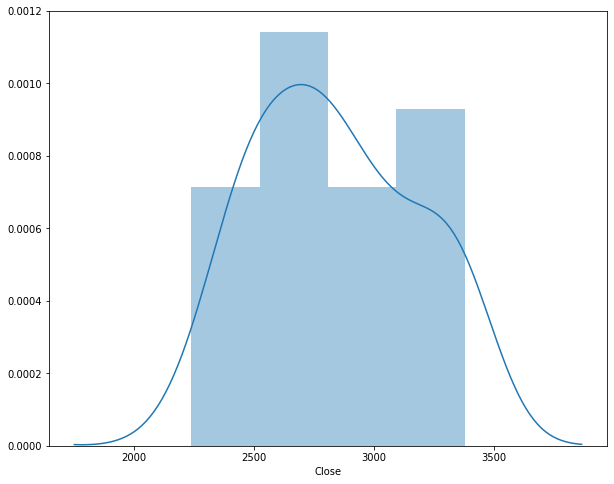

In [137]:
plt.figure(figsize=(10,8))
plt.tight_layout()
seabornInstance.distplot(result['Close'])

#### Split 80% as training and 20% as testing set 

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Train the model

In [139]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [140]:
coeff_df = pd.DataFrame(regressor.coef_,result[['EFFR','Price', 'province_confirmedCount', 'province_curedCount', 'province_deadCount']].columns , columns=['Coefficient'])  
coeff_df

,Coefficient
EFFR,590.204534
Price,-0.154085
province_confirmedCount,0.001832
province_curedCount,-0.006372
province_deadCount,-0.009533


#### Prediction:

In [141]:
y_pred = regressor.predict(X_test)

In [142]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,2237.399902,2393.091885
1,3357.750000,3189.864328
2,2398.100098,2425.362989
3,2447.330078,2388.969894
4,2630.070068,2397.686517
5,2526.899902,2543.430383
6,2626.649902,2492.787357
7,2659.409912,2689.471123
8,3380.159912,3187.230969
9,3128.209961,3179.460405


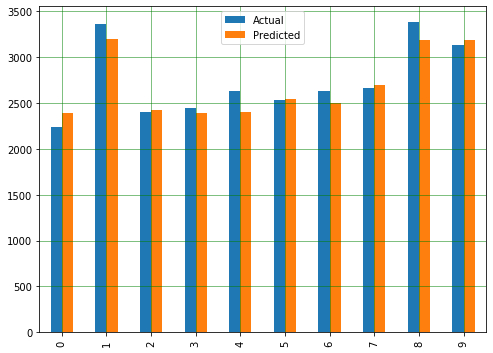

In [143]:
df.plot(kind='bar',figsize=(8,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [144]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy: ',1-np.sqrt(metrics.mean_squared_error(y_test, y_pred))/result.Price.mean())

Mean Absolute Error: 106.6217904235939
Root Mean Squared Error: 130.20030042538818
Accuracy:  0.919339715447487


The accurancy is above 90%, seems to be a great model. Also, we find that EFFR is a key feature in the price prediction.However,the EFFR can be changed by the government and that is much likely to be the reason why its trend is so similar with stock price---- it was reduced on March 3rd! 

We can not involve EFFR, it is not convincing and not predictable. So:

### What if not include 'EFFR'? 

In [145]:
X = result[['Price', 'province_confirmedCount', 'province_curedCount', 'province_deadCount']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_,result[['Price', 'province_confirmedCount', 'province_curedCount', 'province_deadCount']].columns , columns=['Coefficient'])  
coeff_df

,Coefficient
Price,2.290154
province_confirmedCount,-0.002904
province_curedCount,0.031323
province_deadCount,-0.004174


In [146]:
y_pred = regressor.predict(X_test)
df1 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

,Actual,Predicted
0,2237.399902,2775.393358
1,3357.750000,2881.487300
2,2398.100098,2681.632130
3,2447.330078,2890.686870
4,2630.070068,2876.984844
5,2526.899902,2641.503514
6,2626.649902,2719.460198
7,2659.409912,2596.657160
8,3380.159912,2920.485182
9,3128.209961,3036.489223


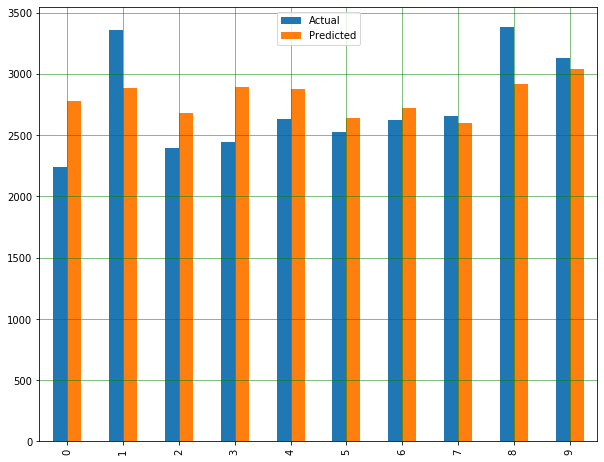

In [147]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [148]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy: ',1-np.sqrt(metrics.mean_squared_error(y_test, y_pred))/result.Price.mean())

Mean Absolute Error: 280.9621882905239
Root Mean Squared Error: 331.5998913963716
Accuracy:  0.7945708150424647


Not bad. Still have accurancy as nearly 80%. We will use this model for future prediction!

## Step 3: Extend the data of attributes

In this part, we will find the pattern of data growth and follow the pattern by iterating those data of attributes for nearly 3 months.

### Extend an additional 3 months

In [149]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [150]:
extend_3_months = [x + relativedelta(months=2, days=18) for x in result.index]
extend_3_months

[Timestamp('2020-04-21 00:00:00'),
 Timestamp('2020-04-22 00:00:00'),
 Timestamp('2020-04-24 00:00:00'),
 Timestamp('2020-04-28 00:00:00'),
 Timestamp('2020-04-29 00:00:00'),
 Timestamp('2020-04-30 00:00:00'),
 Timestamp('2020-05-01 00:00:00'),
 Timestamp('2020-05-02 00:00:00'),
 Timestamp('2020-05-08 00:00:00'),
 Timestamp('2020-05-12 00:00:00'),
 Timestamp('2020-05-13 00:00:00'),
 Timestamp('2020-05-14 00:00:00'),
 Timestamp('2020-05-15 00:00:00'),
 Timestamp('2020-05-16 00:00:00'),
 Timestamp('2020-05-20 00:00:00'),
 Timestamp('2020-05-21 00:00:00'),
 Timestamp('2020-05-22 00:00:00'),
 Timestamp('2020-05-23 00:00:00'),
 Timestamp('2020-05-24 00:00:00'),
 Timestamp('2020-05-27 00:00:00'),
 Timestamp('2020-05-28 00:00:00'),
 Timestamp('2020-05-29 00:00:00'),
 Timestamp('2020-05-30 00:00:00'),
 Timestamp('2020-05-31 00:00:00'),
 Timestamp('2020-06-03 00:00:00'),
 Timestamp('2020-06-04 00:00:00'),
 Timestamp('2020-06-05 00:00:00'),
 Timestamp('2020-06-06 00:00:00'),
 Timestamp('2020-06-

In [151]:
len(extend_3_months)

49

### Extend covid-19 numbers(confirmed, cured, death case number)

We assume that today(4/21/2020) is the turning point of the pandamic in US. So all the data will have the best growth today and the growth rate in the future will be a reverse of those in previous days.

In [152]:
result.province_confirmedCount.tail()

Date
2020-04-14    558526
2020-04-15    583220
2020-04-16    609696
2020-04-17    640014
2020-04-20    755533
Name: province_confirmedCount, dtype: int64

In [153]:
result.province_curedCount.tail()

Date
2020-04-14    42018
2020-04-15    44319
2020-04-16    49966
2020-04-17    52772
2020-04-20    67172
Name: province_curedCount, dtype: int64

In [154]:
result.province_deadCount.tail()

Date
2020-04-14    22146
2020-04-15    23654
2020-04-16    26059
2020-04-17    31002
2020-04-20    40461
Name: province_deadCount, dtype: int64

#### 1. Predict future confirmed numbers

In [155]:
confirmed_mirror = result.province_confirmedCount.tolist()
confirmed_mirror.reverse()
confirmed_mirror

[755533,
 640014,
 609696,
 583220,
 558526,
 530830,
 399979,
 369069,
 337971,
 335524,
 216722,
 190089,
 164603,
 159184,
 124686,
 69194,
 55243,
 53588,
 40910,
 26997,
 10259,
 7111,
 5010,
 3700,
 2885,
 1004,
 1004,
 704,
 572,
 572,
 163,
 126,
 100,
 96,
 63,
 60,
 57,
 53,
 35,
 35,
 15,
 14,
 13,
 13,
 12,
 12,
 12,
 11,
 9]

In [156]:
conm2=confirmed_mirror[1:]
conm2

[640014,
 609696,
 583220,
 558526,
 530830,
 399979,
 369069,
 337971,
 335524,
 216722,
 190089,
 164603,
 159184,
 124686,
 69194,
 55243,
 53588,
 40910,
 26997,
 10259,
 7111,
 5010,
 3700,
 2885,
 1004,
 1004,
 704,
 572,
 572,
 163,
 126,
 100,
 96,
 63,
 60,
 57,
 53,
 35,
 35,
 15,
 14,
 13,
 13,
 12,
 12,
 12,
 11,
 9]

In [157]:
delta_confirmed=[confirmed_mirror[i]-conm2[i] for i in range(0,len(conm2))]
delta_confirmed

[115519,
 30318,
 26476,
 24694,
 27696,
 130851,
 30910,
 31098,
 2447,
 118802,
 26633,
 25486,
 5419,
 34498,
 55492,
 13951,
 1655,
 12678,
 13913,
 16738,
 3148,
 2101,
 1310,
 815,
 1881,
 0,
 300,
 132,
 0,
 409,
 37,
 26,
 4,
 33,
 3,
 3,
 4,
 18,
 0,
 20,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 2]

In [158]:
def confirmed_pre():
    confirmed_extrapolate=[0 for i in range(len(delta_confirmed)+1)]
    confirmed_extrapolate[0]=755533
    for i in range(1,len(delta_confirmed)):
        confirmed_extrapolate[i] = confirmed_extrapolate[i-1] +delta_confirmed[i-1]
    confirmed_extrapolate[i+1]=confirmed_extrapolate[i]
    return confirmed_extrapolate

In [159]:
confirmed_extra=confirmed_pre()
confirmed_extra

[755533,
 871052,
 901370,
 927846,
 952540,
 980236,
 1111087,
 1141997,
 1173095,
 1175542,
 1294344,
 1320977,
 1346463,
 1351882,
 1386380,
 1441872,
 1455823,
 1457478,
 1470156,
 1484069,
 1500807,
 1503955,
 1506056,
 1507366,
 1508181,
 1510062,
 1510062,
 1510362,
 1510494,
 1510494,
 1510903,
 1510940,
 1510966,
 1510970,
 1511003,
 1511006,
 1511009,
 1511013,
 1511031,
 1511031,
 1511051,
 1511052,
 1511053,
 1511053,
 1511054,
 1511054,
 1511054,
 1511055,
 1511055]

#### 2. Same way to predict future dead numbers:

In [160]:
dead_mirror = result.province_deadCount.tolist()
dead_mirror.reverse()
len(dead_mirror)

49

In [161]:
dm2=dead_mirror[1:]
len(dm2)

48

In [162]:
delta_dead=[dead_mirror[i]-dm2[i] for i in range(0,len(dm2))]
len(delta_dead)

48

In [163]:
def dead_pre():
    dead_extrapolate=[0 for i in range(len(delta_dead)+1)]
    dead_extrapolate[0]=40461
    for i in range(1,len(delta_dead)):
        dead_extrapolate[i] = dead_extrapolate[i-1] +delta_dead[i-1]
    dead_extrapolate[i+1]=dead_extrapolate[i]
    return dead_extrapolate

In [164]:
dead_extra=dead_pre()
len(dead_extra)

49

#### 3. and cure numbers:

In [165]:
cured_mirror = result.province_curedCount.tolist()
cured_mirror.reverse()
len(cured_mirror)

49

In [166]:
cum2=cured_mirror[1:]
len(cum2)

48

In [167]:
delta_cured=[cured_mirror[i]-cum2[i] for i in range(0,len(cum2))]
len(delta_cured)

48

In [168]:
def cured_pre():
    cured_extrapolate=[0 for i in range(len(delta_cured)+1)]
    cured_extrapolate[0]=67172
    for i in range(1,len(delta_cured)):
        cured_extrapolate[i] = cured_extrapolate[i-1] +delta_cured[i-1]
    cured_extrapolate[i+1]=cured_extrapolate[i]
    return cured_extrapolate

In [169]:
cured_extra=cured_pre()
len(cured_extra)

49

#### Merge those covid-19 related prediction numbers together:

In [170]:
result1 = pd.DataFrame(list(zip(confirmed_extra, cured_extra, dead_extra)),
                      index = extend_3_months, columns = ['province_confirmedCount','province_curedCount','province_deadCount'])
result1

,province_confirmedCount,province_curedCount,province_deadCount
2020-04-21,755533,67172,40461
2020-04-22,871052,81572,49920
2020-04-24,901370,84378,54863
2020-04-28,927846,90025,57268
2020-04-29,952540,92326,58776
2020-04-30,980236,102030,60276
2020-05-01,1111087,111805,68010
2020-05-02,1141997,114341,69904
2020-05-08,1173095,116762,71268
2020-05-12,1175542,117078,71360


### Extend gold price

We have searched the information on the internet that there is a formula to predict gold price(XAU) and applies below:

In [171]:
def ex1(list1, n):

    list2 = [] 
    for i in range(len(list1)-n,len(list1)):
        av3=(list1[i-1]+list1[i-2]+list1[i-3])/3
        av9=(list1[i-1]+list1[i-2]+list1[i-3]+list1[i-4]+list1[i-5]+list1[i-6]+list1[i-7]+list1[i-8]+list1[i-9])/9
        p=1.25*av3-0.26*av9+1.94
        list2.append(p)
    return list2

In [172]:
extendXAU=ex1(result['Price'],49)
extendXAU

[1685.5829333333336,
 1628.5315444444445,
 1576.191777777778,
 1526.5531333333333,
 1528.9267666666663,
 1539.9189777777783,
 1543.7720000000004,
 1549.5786777777778,
 1559.5464444444447,
 1584.225233333333,
 1616.9282666666668,
 1635.6523555555557,
 1641.9819555555555,
 1632.3041222222225,
 1610.8633777777782,
 1589.6257666666666,
 1586.719788888889,
 1606.3676999999998,
 1638.1803,
 1652.1483444444445,
 1669.3410444444442,
 1660.2153222222223,
 1644.093455555556,
 1601.359344444444,
 1553.2641,
 1506.7048333333332,
 1489.5909555555554,
 1476.8321333333333,
 1464.5323888888888,
 1457.1515111111112,
 1488.0410111111112,
 1551.3457333333333,
 1598.4310555555553,
 1628.2061222222223,
 1625.6729111111113,
 1626.8987666666667,
 1598.9929222222222,
 1583.5550888888888,
 1576.2544777777775,
 1594.0287666666663,
 1621.157688888889,
 1634.7919555555554,
 1646.079588888889,
 1653.108955555556,
 1677.7169888888886,
 1707.7996111111113,
 1717.8423333333333,
 1716.5202666666664,
 1695.852500000000

In [173]:
extendXAU=pd.DataFrame(extendXAU,index=extend_3_months,columns=['Price'])
extendXAU

,Price
2020-04-21,1685.582933
2020-04-22,1628.531544
2020-04-24,1576.191778
2020-04-28,1526.553133
2020-04-29,1528.926767
2020-04-30,1539.918978
2020-05-01,1543.772000
2020-05-02,1549.578678
2020-05-08,1559.546444
2020-05-12,1584.225233


### Merge all extended data together

In [174]:
result2=extendXAU.join(result1)
result2

,Price,province_confirmedCount,province_curedCount,province_deadCount
2020-04-21,1685.582933,755533,67172,40461
2020-04-22,1628.531544,871052,81572,49920
2020-04-24,1576.191778,901370,84378,54863
2020-04-28,1526.553133,927846,90025,57268
2020-04-29,1528.926767,952540,92326,58776
2020-04-30,1539.918978,980236,102030,60276
2020-05-01,1543.772000,1111087,111805,68010
2020-05-02,1549.578678,1141997,114341,69904
2020-05-08,1559.546444,1173095,116762,71268
2020-05-12,1584.225233,1175542,117078,71360


In [175]:
extend_data = pd.concat([result, result2],sort=True)
extend_data = extend_data.drop(columns=['EFFR'])
extend_data

,Close,Price,province_confirmedCount,province_curedCount,province_deadCount
2020-02-03,3248.919922,1576.450000,9,0,0
2020-02-04,3297.590088,1552.560000,11,0,0
2020-02-06,3345.780029,1566.850000,12,0,0
2020-02-10,3352.090088,1572.300000,12,0,0
2020-02-11,3357.750000,1567.710000,12,0,0
...,...,...,...,...,...
2020-07-02,NaN,1677.716989,1511054,134344,80922
2020-07-03,NaN,1707.799611,1511054,134344,80922
2020-07-04,NaN,1717.842333,1511054,134344,80922
2020-07-05,NaN,1716.520267,1511055,134344,80922


## Step 4: Predict future stock price

We will use the tested model to predict future stock price. Those coefficients come from the linear regression we have done in the beginning. 0.79 is the accurancy of the linear regression.

In [176]:
def predict(df):
    list2 = [] 
    for i in range(len(df)-50,len(df)-1):        
        df.iloc[i,0]=(2.290154*df.iloc[i,1]-0.002904*df.iloc[i,2]+0.031233*df.iloc[i,3]-0.004174*df.iloc[i,4])*0.7945708150424646
    return df

In [177]:
re=predict(extend_data)
re.tail(50)

,Close,Price,province_confirmedCount,province_curedCount,province_deadCount
2020-04-20,2872.217620,1694.110000,755533,67172,40461
2020-04-21,2856.701006,1685.582933,755533,67172,40461
2020-04-22,2812.323981,1628.531544,871052,81572,49920
2020-04-24,2700.367458,1576.191778,901370,84378,54863
2020-04-28,2681.113288,1526.553133,927846,90025,57268
2020-04-29,2680.554983,1528.926767,952540,92326,58776
2020-04-30,2872.498426,1539.918978,980236,102030,60276
2020-05-01,2794.514136,1543.772000,1111087,111805,68010
2020-05-02,2790.411670,1549.578678,1141997,114341,69904
2020-05-08,2792.351127,1559.546444,1173095,116762,71268


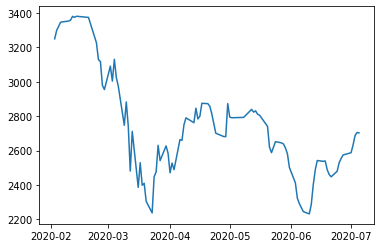

In [178]:
plt.plot(re['Close'])
plt.show()